# Cluster Analysis in Python

## K-Means Clustering
A Summary of lecture "Cluster Analysis in Python", via datacamp


* Notebook author: Elesmy Orellana 
* Categories: [Python, Datacamp, Machine_Learning]


### Overview
You have probably come across Google News, which automatically groups similar news articles under a topic. Have you ever wondered what process runs in the background to arrive at these groups? We will be exploring unsupervised learning through clustering using the SciPy library in Python. We will cover pre-processing of data and application of hierarchical and k-means clustering. We will explore player statistics from a popular football video game, FIFA 18. We will be able to quickly apply various clustering algorithms on data, visualize the clusters formed and analyze results.

In [63]:
import re

import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import (linkage, 
                                     fcluster, 
                                     dendrogram)
from scipy.cluster.vq import (kmeans, 
                              vq, 
                              whiten)

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

### Introduction to Clustering
Before we are ready to classify news articles, we need to be introduced to the basics of clustering. We will familiarize ourselves with a class of machine learning algorithms called unsupervised learning and clustering, one of the popular unsupervised learning algorithms. We will explore two popular clustering techniques - hierarchical clustering and k-means clustering. We will conclude with basic pre-processing steps before we start clustering data.

### Unsupervised learning: basics

Everyday example: Google news
### How does Google News classify articles?
Unsupervised Learning Algorithm: Clustering
Match frequent terms in articles to find similarity

#### What is unsupervised learning?
A group of machine learning algorithms that find patterns in data
Data for algorithms has not been labeled, classified or characterized
The objective of the algorithm is to interpret any structure in the data
Common unsupervised learning algorithms: clustering, neural networks, anomaly detection


### What is clustering?

The process of grouping items with similar characteristics
Items in groups similar to each other than in other groups
Example: distance between points on a 2D plane
Plotting data for clustering - Pokemon sightings

C:\Users\elesm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


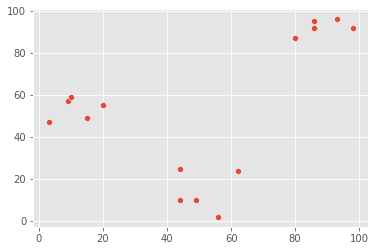

In [64]:
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]

_ = sns.scatterplot(x_coordinates, y_coordinates)
plt.show()

Visualizing helps in determining how many clusters are in the data.

### Unsupervised learning in real world
Segmentation of learners at DataCamp based on courses they complete. The training data has no labels. As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data.

## Pokémon sightings
There have been reports of sightings of rare, legendary Pokémon. We have been asked to investigate! We will plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x_p and y_p, respectively

C:\Users\elesm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


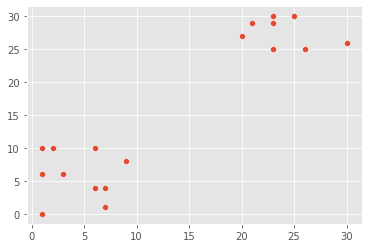

In [65]:
x_p = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y_p = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

_ = sns.scatterplot(x_p, y_p)
plt.show()

Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## Basics of cluster analysis
### What is a cluster?
* A group of items with similar characteristics
* Google News: articles where similar words andword associations appear together
* Customer Segments


## Clustering algorithms
* Hierarchical clustering
* K means clustering
* Other clustering algorithms: DBSCAN, Gaussian Methods


Hierarchical clustering in SciPy

In [66]:
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df_c = pd.DataFrame({'x_cood':x_coordinates, 'y_cood':y_coordinates})
df_c.head()

,x_cood,y_cood
0,80.1,87.2
1,93.1,96.1
2,86.6,95.6
3,98.5,92.4
4,86.4,92.4


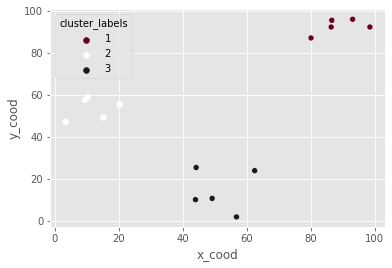

In [67]:
Z_c = linkage(df_c, method="ward")
df_c['cluster_labels'] = fcluster(Z_c, 3, criterion="maxclust")
_ = sns.scatterplot(data=df_c, x="x_cood", y="y_cood", hue="cluster_labels", palette="RdGy")
plt.show()

## K-means clustering in SciPy

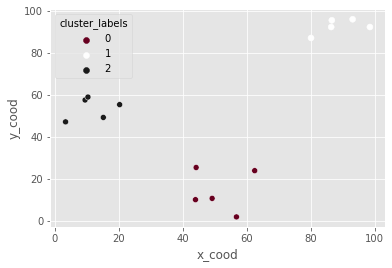

In [68]:
df_c = pd.DataFrame({'x_cood':x_coordinates, 'y_cood':y_coordinates})
centroids_c, _ = kmeans(df_c, 3)
df_c["cluster_labels"], _ = vq(df_c, centroids_c)
_ = sns.scatterplot(data=df_c, x="x_cood", y="y_cood", hue="cluster_labels", palette="RdGy")
plt.show()

## Pokémon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon. In the scatter plot we identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. We will form two clusters of the sightings using hierarchical clustering.

In [69]:
df_p = pd.DataFrame({'x':x_p, 'y':y_p})
df_p.head()

,x,y
0,9,8
1,6,4
2,2,10
3,3,6
4,1,0


'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame,

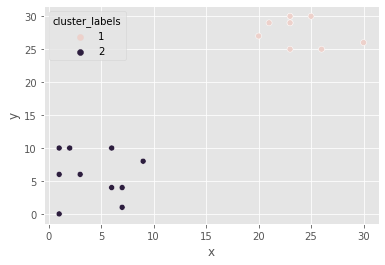

In [70]:
# Use the linkage() function to compute distance
Z_p = linkage(df_p, 'ward')

# Generate cluster labels for each data point with two clusters
df_p['cluster_labels'] = fcluster(Z_p, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x="x", y="y", hue="cluster_labels", data=df_p)
plt.show()

the resulting plot has an extra cluster labelled 0 in the legend.

## Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon. We will use the same example of Pokémon sightings. We will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame

In [71]:
df_p.dtypes

x                 int64
y                 int64
cluster_labels    int32
dtype: object

In [72]:
df_p = df_p.apply(lambda x: x.astype("float"))

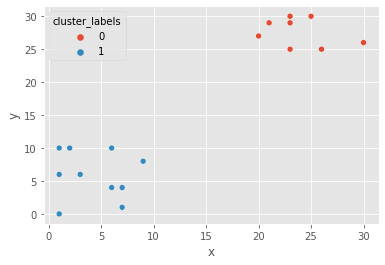

In [73]:
# Compute cluster centers
centroids_p, _ = kmeans(df_p, 2)

# Assign cluster labels to each data point
df_p['cluster_labels'], _ = vq(df_p, centroids_p)

# Plot the points with seaborn
sns.scatterplot(x="x", y="y", hue="cluster_labels", data=df_p)
plt.show()

## Data preparation for cluster analysis
#### Why do we need to prepare data for clustering?


* Variables have incomparable units (product dimensions in cm, price in $)
* Variables with same units have vastly different scales and variances (expenditures on cereals, travel)
* Data in raw form may lead to bias in clustering
* Clusters may be heavily dependent on one variable
* Solution: normalization of individual variables


## Normalization of data
Normalization: process of rescaling data to a standard deviation of 1
x_new = x / std_dev(x)

In [74]:
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)
scaled_data

array([2.72733941, 0.54546788, 1.63640365, 1.63640365, 1.09093577,
       1.63640365, 1.63640365, 4.36374306, 0.54546788, 1.09093577,
       1.09093577, 1.63640365, 2.72733941])

## Illustration: normalization of data

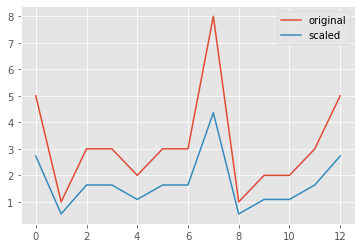

In [75]:
_ = sns.lineplot(x=range(len(data)), y=data, label="original")
_ = sns.lineplot(x=range(len(data)), y=scaled_data, label='scaled')
plt.show()

## Normalize basic list data
let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

In [76]:
goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_goals_for = whiten(goals_for)
scaled_goals_for

array([3.07692308, 2.30769231, 1.53846154, 2.30769231, 0.76923077,
       0.76923077, 1.53846154, 0.        , 0.76923077, 3.07692308])

the scaled values have less variations in them.

## Visualize normalized data
After normalizing the data, we can compare the scaled data to the original data to see the difference.

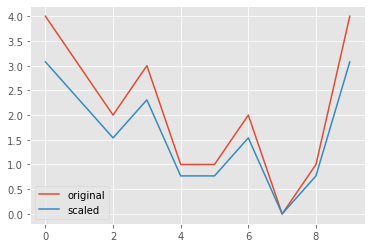

In [77]:
_ = sns.lineplot(x=range(len(goals_for)), y=goals_for, label="original")
_ = sns.lineplot(x=range(len(goals_for)), y=scaled_goals_for, label="scaled")
plt.show()

scaled values have lower variations in them.

## Normalization of small numbers

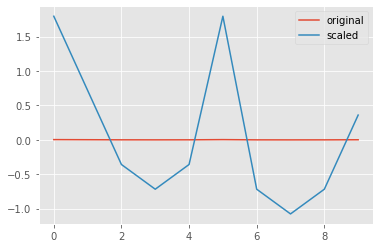

In [78]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_rate_cuts = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_rate_cuts, label='scaled')

plt.legend()
plt.show()

the original data are negligible as compared to the scaled data

## FIFA 18: Normalize data
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that we are about to work on contains data on the 1000 top individual players in the game. We will explore various features of the data as we move ahead.

In [79]:
fifa = pd.read_csv(r"C:\Users\elesm\Downloads\fifa_18_sample_data.csv")
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


We will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

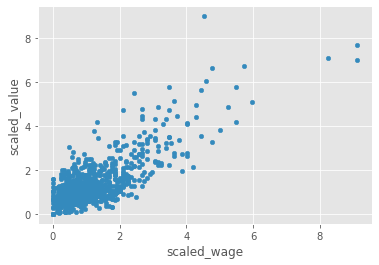

In [80]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x="scaled_wage", y="scaled_value", kind='scatter')
plt.show()

In [81]:
# Check mean and standard deviation of scaled values
fifa[['scaled_wage', 'scaled_value']].describe()

,scaled_wage,scaled_value
count,1000.000000,1000.000000
mean,1.119812,1.306272
std,1.000500,1.000500
min,0.000000,0.000000
25%,0.467717,0.730412
50%,0.854794,1.022576
75%,1.407184,1.542995
max,9.112425,8.984064


## Basics of hierarchical clustering

> ### Creating a distance matrix using linkage
```python
scipy.cluster.hierarchy.linkage(observations,
                                method='single',
                                metric='euclidean',
                                optimal_ordering=False
)
```
- `method`: how to calculate the proximity of clusters
- `metric`: distance metric
- `optimal_ordering`: order data points

> ### Which method should use?
- **single**: based on two closest objects
- **complete**: based on two farthest objects
- **average**: based on the arithmetic mean of all objects
- **centroid**: based on the geometric mean of all objects
- **median**: based on the median of all objects
- **ward**: based on the sum of squares


> ### Create cluster labels with fcluster
```python
scipy.cluster.hierarchy.fcluster(distance_matrix,
                                 num_clusters,
                                 criterion
)
```
- `distance_matrix`: output of `linkage()` method
- `num_clusters`: number of clusters
- `criterion`: how to decide thresholds to form clusters

> ### Final thoughts on selecting a method
- No one right method for all
- Need to carefully understand the distribution of data


## Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. We have the data of last year's footfall, the number of people at the convention ground at a given time. We would like to decide the location of the stall to maximize sales. Using the ward method, we'll apply hierarchical clustering to find the two points of attraction in the area.

In [82]:
comic_con = pd.read_csv(r"C:\Users\elesm\OneDrive\Documents\comic_con.csv")
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


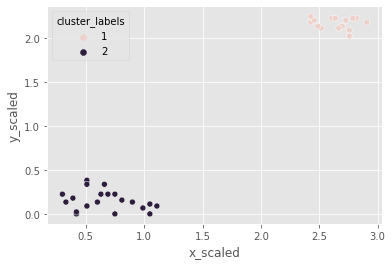

In [83]:
# Use the linkage() function
distance_matrix_cc = linkage(comic_con[['x_scaled', 'y_scaled']], method = "ward", metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix_cc, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and the top right (an interesting stall).

## Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

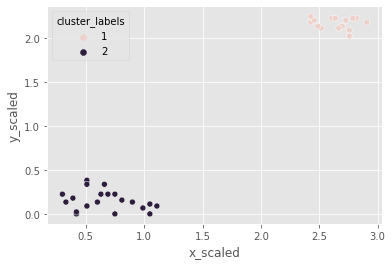

In [84]:
# Use the linkage() function
distance_matrix_cc = linkage(comic_con[['x_scaled', 'y_scaled']], method = "single", metric = "euclidean")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix_cc, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

the clusters formed are not different from the ones created using the ward method.

## Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

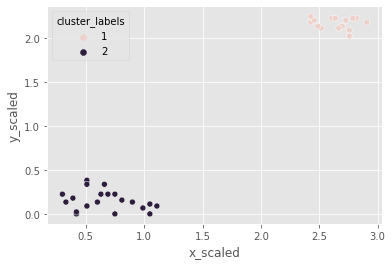

In [85]:
# Use the linkage() function
distance_matrix_cc = linkage(comic_con[['x_scaled', 'y_scaled']], method="complete")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix_cc, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Visualize clusters


> ### Why visualize clusters?
- Try to make sense of the clusters formed
- An additional step in validation of clusters
- Spot trends in data


> ### An introduction to seaborn
- `seaborn`: a Python data visualization library based on matplotlib
- Has better, easily modiable aesthetics than matplotlib!
- Contains functions that make data visualization tasks easy in the context of data analytics
- Use case for clustering: `hue` parameter for plots

## Visualize clusters with matplotlib

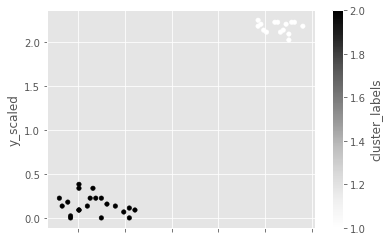

In [86]:
# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled',
                       y='y_scaled',
                       c='cluster_labels')
plt.show()

## Visualize clusters with seaborn

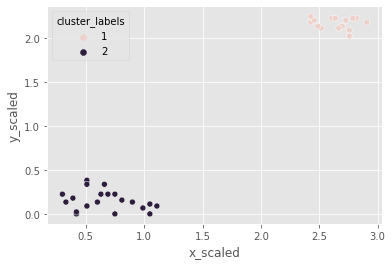

In [87]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

## How many clusters?

> ### Introduction to dendrograms
- Strategy till now - decide clusters on visual inspection 
- Dendrograms help in showing progressions as clusters are merged 
- A dendrogram is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes

## Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

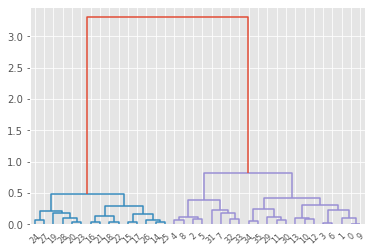

In [88]:
# Create a dendrogram
dn_cc = dendrogram(distance_matrix_cc)

# Display the dendogram
plt.show()

## Limitations of hierarchical clustering

> ### Measuring speed in hierarchical clustering
- `timeit` module 
- Measure the speed of `.linkage()` method
- Use randomly generated points
- Run various iterations to extrapolate

In [89]:
points_s = 100
df_s = pd.DataFrame({'x':np.random.sample(points_s),
                    'y':np.random.sample(points_s)})
%timeit linkage(df_s[['x', 'y']], method='ward', metric='euclidean')

745 µs ± 57.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Comparison of runtime of linkage method
* Increasing runtime with data points
* Quadratic increase of runtime
* Not feasible for large datasets

In [90]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method="complete", metric='euclidean')

512 µs ± 36.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

* sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
* aggression: a number between 0-99 which signifies the commitment and will of a player


These are typically high in defense-minded players. We will perform clustering based on these attributes in the data.

In [91]:
fifa[['sliding_tackle', 'aggression']].head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [92]:
fifa['scaled_sliding_tackle'] = whiten(fifa.sliding_tackle)
fifa['scaled_aggression'] = whiten(fifa.aggression)

In [93]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix_f = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix_f, 3, criterion='maxclust')
# Display cluster centers of each cluster
fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean()

,scaled_sliding_tackle,scaled_aggression
cluster_labels,,
1,2.837810,4.280968
2,0.579966,1.766698
3,1.166930,3.415214


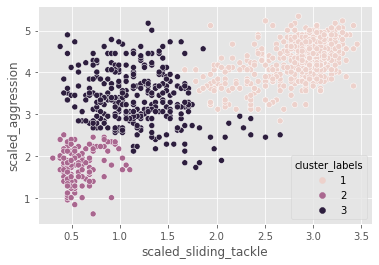

In [94]:
# Create a scatter plot through seaborn
sns.scatterplot(x="scaled_sliding_tackle", y="scaled_aggression", hue="cluster_labels", data=fifa)
plt.show()

# K-Means Clustering

Exploring a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering. As dendrograms are specific to hierarchical clustering, we will discuss one method to find the number of clusters before running k-means clustering. We will conclude with a discussion on the limitations of k-means clustering and discuss considerations while using this algorithm.

## Basics of k-means clustering

> ### Why k-means clustering?
- A critical drawback of hierarchical clustering: runtime
- K means runs signicantly faster on large datasets

> ### Step 1: Generate cluster centers
```python
kmeans(obs, k_or_guess, iter, thresh, check_finite)
```
- `obs`: standardized observations
- `k_or_guess`: number of clusters
- `iter`: number of iterations (default: 20)
- `thres`: threshold (default: 1e-05)
- `check_finite`: whether to check if observations contain only finite numbers (default: True)
- Returns two objects: 
  - cluster centers, distortion


> ### Step 2: Generate cluster labels
```python
vq(obs, code_book, check_finite=True)
```
- `obs`: standardized observations
- `code_book`: cluster centers
- `check_finite`: whether to check if observations contain only finite numbers (default: True)
- Returns two objects: 
  - a list of cluster labels, 
  - a list of distortions

> ### A note on distortions
- `kmeans` returns a single value of distortions
- `vq` returns a list of distortions.

> ### Running k-means

## K-means clustering
Let us use the Comic Con dataset and check how k-means clustering works on it.

the two steps of k-means clustering:

* Define cluster centers through `kmeans` function. It has two required arguments: observations and number of clusters.
* Assign cluster labels through the `vq` function. It has two required arguments: observations and cluster centers.

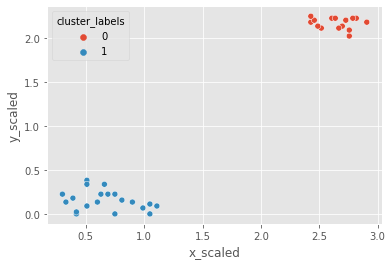

In [95]:
# Generate cluster centers
cluster_centers_cc, distortion_cc = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list_cc = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers_cc)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Runtime of k-means clustering

In [96]:
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 3)

19.5 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


It took only about 5 seconds to run hierarchical clustering on this data, but only 50 milliseconds to run k-means clustering.

## How many clusters?

> ### How to find the right k?
- No absolute method to find right number of clusters (k) in k-means clustering
- Elbow method

> ### Distortions revisited
- **Distortion**: sum of squared distances of points from cluster centers
- Decreases with an increasing number ofclusters
- Becomes zero when the number of clusters equals the number of points
- **Elbow plot**: line plot between cluster centers and distortion

> ### Elbow method
- **Elbow plot**: plot of the number of clusters and distortion
- Elbow plot helps indicate number of clusters present in data

> ### Final thoughts on using the elbow method
- Only gives an indication of optimal k (numbers of clusters)
- Does not always pinpoint how many k (numbers of clusters)
- Other methods: average silhouette and gap statistic

#### Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters.

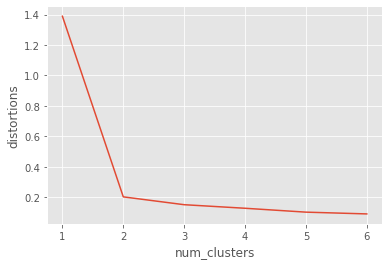

In [97]:
distortions_cc = []
num_clusters_cc = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters_cc:
    cluster_centers_cc, distortion_cc = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions_cc.append(distortion_cc)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot_cc = pd.DataFrame({'num_clusters': num_clusters_cc, 'distortions': distortions_cc})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot_cc)
plt.xticks(num_clusters_cc)
plt.show()

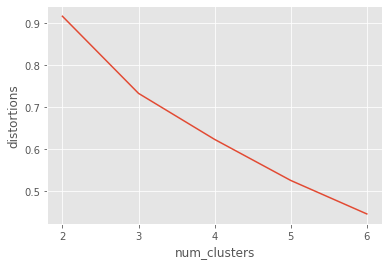

In [98]:
uniform_data = pd.read_csv(r"C:\Users\elesm\OneDrive\Documents\uniform_data.csv")
distortions_u = []
num_clusters_u = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters_u:
    cluster_centers_u, distortion_u = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions_u.append(distortion_u)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot_u = pd.DataFrame({'num_clusters': num_clusters_u, 'distortions': distortions_u})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data=elbow_plot_u)
plt.xticks(num_clusters_u)
plt.show()

## Limitations of k-means clustering


- How to find the right K (number of clusters)?
- Impact of seeds
- Biased towards equal sized clusters


> ### Final thoughts
- Each technique has its pros and cons
- Consider your data size and patterns before deciding on algorithm
- Clustering is exploratory phase of analysis

### Impact of seeds on distinct clusters
whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

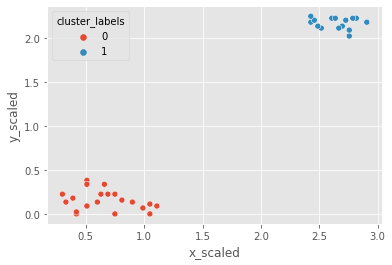

In [99]:
# Initialize seed
np.random.seed(0)

# Run kmeans clustering
cluster_centers_cc, distortion_cc = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list_cc = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers_cc)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

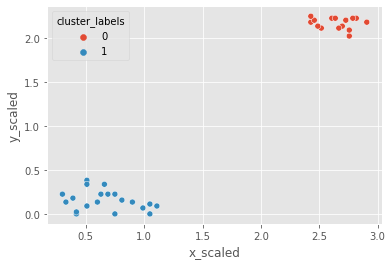

In [100]:
# Initialize seed
np.random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers_cc, distortion_cc = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list_cc = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers_cc)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Uniform clustering patterns
let us look at the bias in k-means clustering towards the formation of uniform clusters. Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

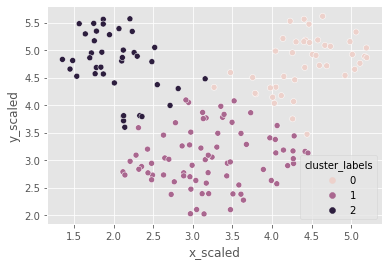

In [101]:
mouse = pd.read_csv(r"C:\Users\elesm\OneDrive\Documents\mouse.csv")
# Generate cluster centers
cluster_centers_m, distortion_m = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list_m = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers_m)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

### FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

* defending: a number which signifies the defending attributes of a player
* physical: a number which signifies the physical attributes of a player

These are typically defense-minded players. We will perform clustering based on these attributes in the data.

In [102]:
fifa = pd.read_csv(r"C:\Users\elesm\OneDrive\Documents\fifa2.csv")

# Set up a random seed in numpy
np.random.seed([1000, 2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)
# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)
# Display cluster centers 
fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean()

,scaled_def,scaled_phy
cluster_labels,,
0,3.743692,8.867419
1,1.865936,7.082691
2,2.096297,8.944870


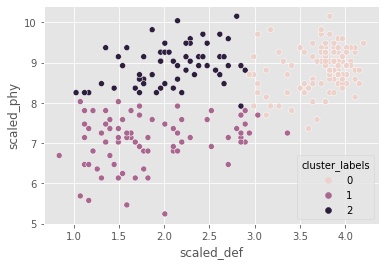

In [103]:
# Create a scatter plot through seaborn
sns.scatterplot(x="scaled_def", y="scaled_phy", hue="cluster_labels", data=fifa)
plt.show()

# Clustering in Real World

Applying clustering knowledge to real-world problems. We will explore the process of finding dominant colors in an image, before moving on to the problem - clustering of news articles. We will conclude with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

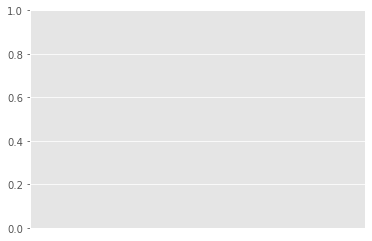

In [137]:
pixels[['scaled_red', 'scaled_blue', 'scaled_green']] = pixels[['red', 'blue', 'green']].apply(lambda x: x/np.std(x)*255)
distortions_i = []
num_clusters_i = []

for i in num_clusters_i:
    cluster_centers_i, distortion_i = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions_i.append(distortion_i)

elbow_plot_i = pd.DataFrame({'num_clusters':num_clusters_i, 'distortions':distortions_i})
_ = sns.lineplot(data=elbow_plot_i, x="num_clusters", y='distortions')
plt.xticks(num_clusters_i)
plt.show()

### Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

* Extract RGB values into three lists.
* Perform k-means clustering on scaled RGB values.
* Display the colors of cluster centers.

In [138]:
batman_df = pd.read_csv(r'C:\Users\elesm\OneDrive\Documents\batman.csv')
batman_df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,10,15,9,0.134338,0.179734,0.126269
1,14,49,36,0.188074,0.587133,0.505076
2,55,125,103,0.738862,1.497787,1.445077
3,35,129,98,0.470185,1.545716,1.374928
4,38,134,101,0.510486,1.605628,1.417017


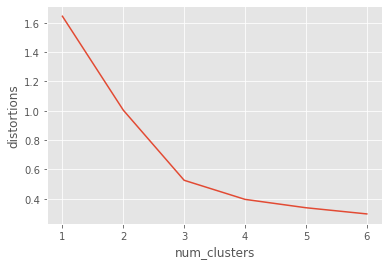

In [139]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

there are three distinct colors present in the image, which is supported by the elbow plot.

### Display dominant colors
To display the dominant colors, we will convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula:

```python
converted_pixel = standardized_pixel * pixel_std / 255
```

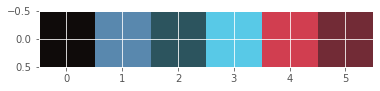

In [140]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

### Document clustering

> ### concepts
1. Clean data before processing
2. Determine the importance of the terms in a document (in TF-IDF matrix)
3. Cluster the TF-IDF matrix4. Find top terms, documents in each cluste

> ### Clean and tokenize data
- Convert text into smaller parts called tokens, clean data for processing

> ### TF-IDF (Term Frequency - Inverse DocumentFrequency)
- A weighted measure: evaluate how important a word is to a document in a collection

> ### Clustering with sparse matrix
- kmeans() in SciPy does not support sparse matrices 
- Use `.todense()` to convert to a matrix 
```python
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)
```

> ### Top terms per cluster
- Cluster centers: lists with a size equal to the number of terms
- Each value in the cluster center is its importance
- Create a dictionary and print top terms

> ### More considerations
- Work with hyperlinks, emoticons etc.
- Normalize words (run, ran, running -> run)
- `.todense()` may not work with large datasets

In [141]:
def remove_noise(text, stop_words = []):    
    tokens = word_tokenize(text)    
    cleaned_tokens = []    
    for token in tokens:        
        token = re.sub('[^A-Za-z0-9]+', '', token)        
        if len(token) > 1 and token.lower() not in stop_words:            
            # Get lowercase            
            cleaned_tokens.append(token.lower())    
    return cleaned_tokens
remove_noise("It is lovely weather we are having. I hope the weather continues.")

['it',
 'is',
 'lovely',
 'weather',
 'we',
 'are',
 'having',
 'hope',
 'the',
 'weather',
 'continues']

## TF-IDF of movie plots
Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

In [142]:
stop_words_2 = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'dont', 'should', 'shouldve', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'arent', 'couldn', 'couldnt', 'didn', 'didnt', 'doesn', 'doesnt', 'hadn', 'hadnt', 'hasn', 'hasnt', 'haven', 'havent', 'isn', 'isnt', 'ma', 'mightn', 'mightnt', 'mustn', 'mustnt', 'needn', 'neednt', 'shan', 'shant', 'shouldn', 'shouldnt', 'wasn', 'wasnt', 'weren', 'werent', 'won', 'wont', 'wouldn', 'wouldnt']


In [143]:
remove_noise("It is lovely weather we are having. I hope the weather continues.", stop_words=stop_words_2)

['lovely', 'weather', 'hope', 'weather', 'continues']

In [144]:
def remove_noise(text, stop_words = stop_words_2):    
    tokens = word_tokenize(text)    
    cleaned_tokens = []    
    for token in tokens:        
        token = re.sub('[^A-Za-z0-9]+', '', token)        
        if len(token) > 1 and token.lower() not in stop_words:            
            # Get lowercase            
            cleaned_tokens.append(token.lower())    
    return cleaned_tokens

In [145]:
plots = pd.read_csv(r'C:\Users\elesm\OneDrive\Documents\plots.csv')['0'].to_list()
plots[0][:10]

'Cable Hogu'

In [146]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=.1, max_df=.75, max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

## Top terms in movie clusters

In [147]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['police', 'man', 'wife']
['back', 'father', 'one']


C:\Users\elesm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Clustering with multiple features


> ### Feature reduction
- Factoranalysis
- Multidimensional scaling


### Clustering with many features

Reduce features using a technique like Factor Analysis. explore steps to reduce the number of features.


### Basic checks on clusters

In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players.

In [148]:
fifa = pd.read_csv(r"C:\Users\elesm\OneDrive\Documents\fifa3.csv")
# Print the size of the clusters
fifa.groupby("cluster_labels")['ID'].count()

cluster_labels
0     83
1    107
2     60
Name: ID, dtype: int64

In [149]:
# Print the mean value of wages in each cluster
fifa.groupby(["cluster_labels"])['eur_wage'].mean()

cluster_labels
0    132108.433735
1    130308.411215
2    117583.333333
Name: eur_wage, dtype: float64

### FIFA 18: what makes a complete player?

The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

Here is a sample card:
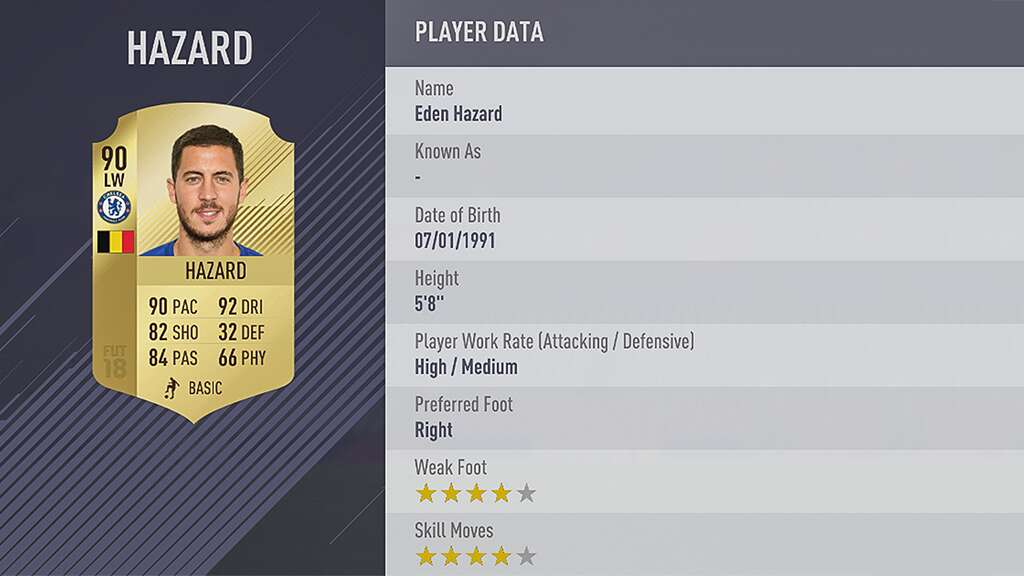

In [150]:
features= ['pac', 'sho', 'pas', 'dri', 'def', 'phy']
scaled_features = ['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']
fifa[scaled_features] = fifa[features].apply(lambda x: whiten(x))
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)
# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
fifa.groupby("cluster_labels")[scaled_features].mean()

,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
cluster_labels,,,,,,
0,6.617743,3.885153,7.353643,7.148098,3.862353,9.009407
1,7.762181,5.610629,8.620873,8.968266,2.262328,8.009867


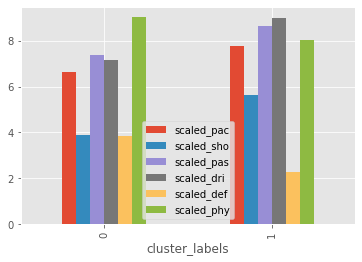

In [151]:
# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind="bar")
plt.show()

In [152]:
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.